In [1]:
import numpy as np
from skimage import io
import cv2

%matplotlib inline

In [2]:
img = io.imread('sonet.jpg')
img = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), cv2.COLOR_RGB2YCrCb)

In [3]:
def normalize(ch):
    maximum, minimum = np.max(ch), np.min(ch)
    return (ch - minimum) / (maximum - minimum) * 255.

ksizes = range(21, 300, 40)
sigmaX = 20

Логарифм

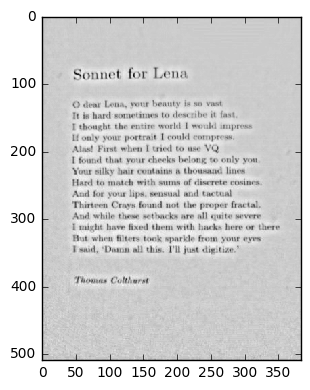

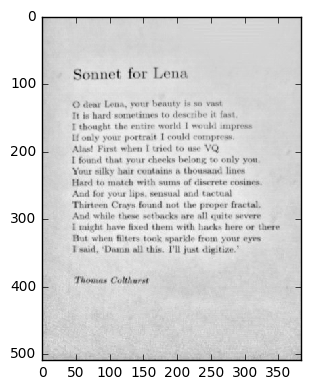

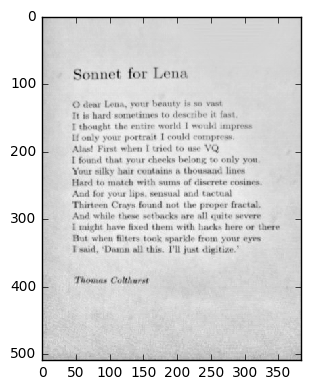

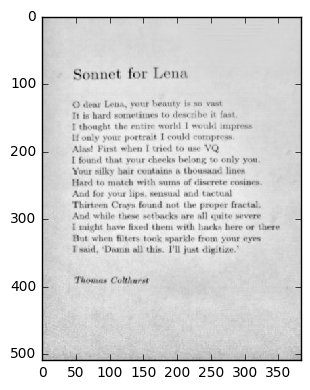

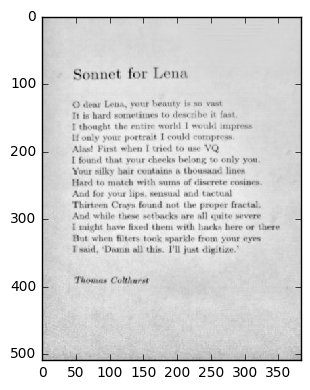

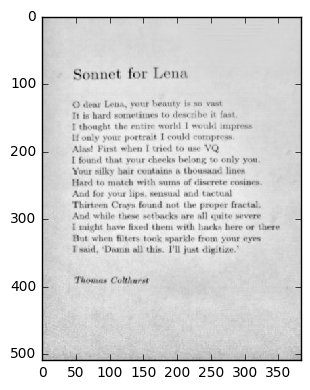

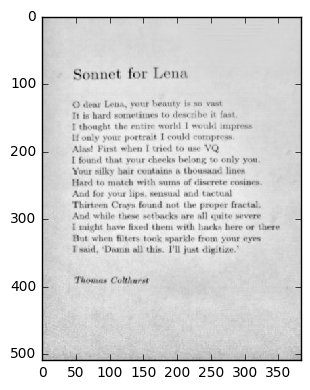

In [4]:
for k in ksizes:
    ch = img[:,:,0]
    ch_blured = cv2.GaussianBlur(ch, (k, k), sigmaX)
    ch_new = np.log(ch/ch_blured.astype(float))
    ch_new = normalize(ch_new)
    
    img_new = np.copy(img)
    img_new[:,:,0] = ch_new
    io.imshow(cv2.cvtColor(img_new, cv2.COLOR_YCrCb2RGB))
    io.show()

Без логарифма

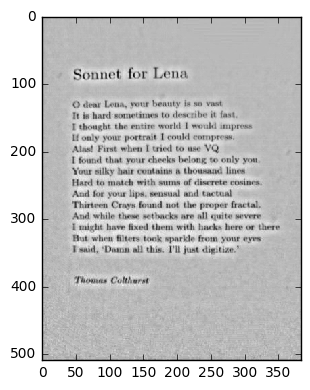

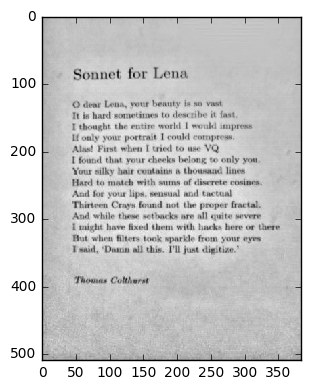

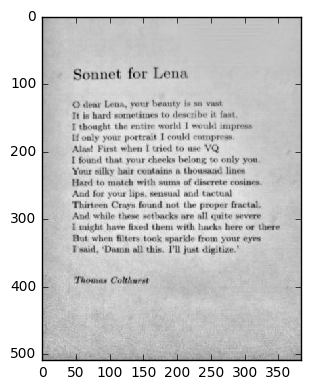

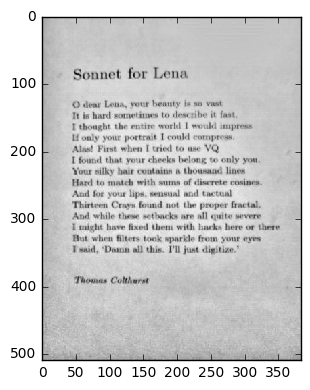

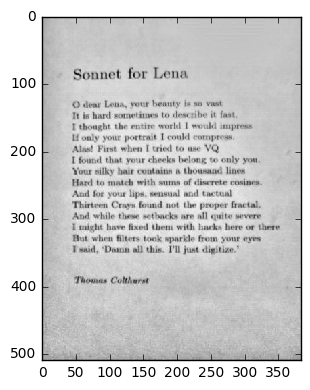

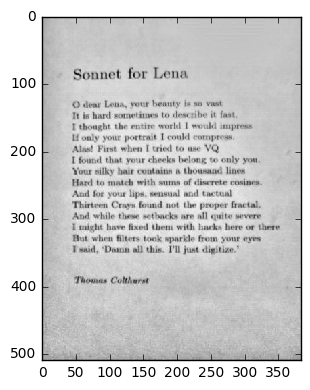

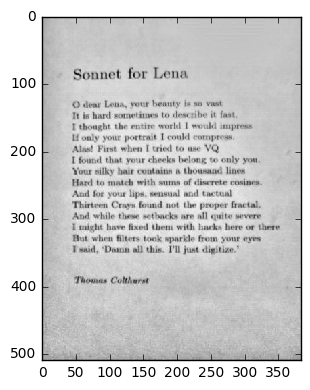

In [5]:
for k in ksizes:
    ch = img[:,:,0]
    ch_blured = cv2.GaussianBlur(ch, (k, k), sigmaX)
    ch_new = ch/ch_blured.astype(float)
    ch_new = normalize(ch_new)
    
    img_new = np.copy(img)
    img_new[:,:,0] = ch_new
    io.imshow(cv2.cvtColor(img_new, cv2.COLOR_YCrCb2RGB))
    io.show()

Второй вариант кажется лучше, т.к. чуть контрастнее. Это можно объяснить тем, что логарифм уменьшает разность между яркостями.

Для обоих методов оптимальным окном кажется наибольшее.